In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:
    
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)    

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
# Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer:

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 349ms/step - loss: 0.5794 - acc: 0.6831 - val_loss: 0.4136 - val_acc: 0.8234
Epoch 2/10
157/157 [==============================] - 54s 343ms/step - loss: 0.3596 - acc: 0.8515 - val_loss: 0.3451 - val_acc: 0.8544
Epoch 3/10
157/157 [==============================] - 53s 340ms/step - loss: 0.2787 - acc: 0.8875 - val_loss: 0.4698 - val_acc: 0.8400
Epoch 4/10
157/157 [==============================] - 54s 343ms/step - loss: 0.2346 - acc: 0.9101 - val_loss: 0.6968 - val_acc: 0.7586
Epoch 5/10
157/157 [==============================] - 52s 334ms/step - loss: 0.1952 - acc: 0.9294 - val_loss: 0.3738 - val_acc: 0.8546
Epoch 6/10
157/157 [==============================] - 54s 344ms/step - loss: 0.1570 - acc: 0.9458 - val_loss: 0.4358 - val_acc: 0.8508
Epoch 7/10
157/157 [==============================] - 54s 346ms/step - loss: 0.1127 - acc: 0.9606 - val_loss: 0.4463 - val_acc: 0.8374
Epoch 8/10
157/157 [==============================] - 5

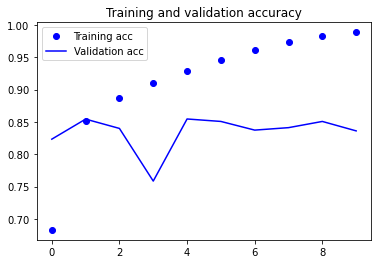

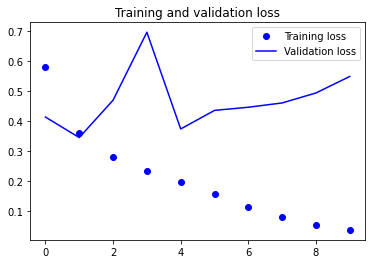

In [7]:
# Let's display the training and validation loss and accuracy:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Unfortunately, our small recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences -- hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that SimpleRNN isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some more advanced layers.

In [8]:
# A concrete LSTM example in Keras
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 29ms/step - loss: 0.5302 - acc: 0.7446 - val_loss: 0.4115 - val_acc: 0.8316
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.2919 - acc: 0.8848 - val_loss: 0.3087 - val_acc: 0.8814
Epoch 3/10
157/157 [==============================] - 5s 31ms/step - loss: 0.2320 - acc: 0.9118 - val_loss: 0.3032 - val_acc: 0.8808
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2038 - acc: 0.9252 - val_loss: 0.2909 - val_acc: 0.8928
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1784 - acc: 0.9348 - val_loss: 0.2861 - val_acc: 0.8918
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1555 - acc: 0.9427 - val_loss: 0.3320 - val_acc: 0.8518
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1435 - acc: 0.9497 - val_loss: 0.4499 - val_acc: 0.8660
Epoch 8/10
157/157 [==============================] - 4s 26ms/step - 

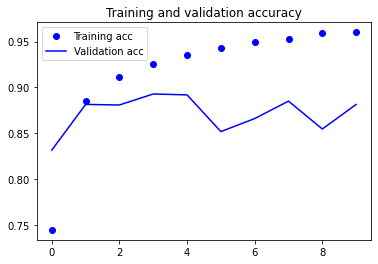

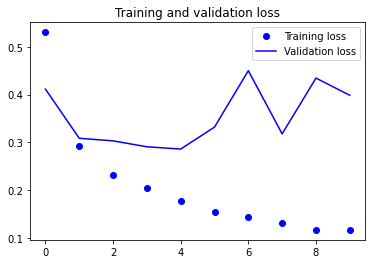

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Can see LSTM model's performance is better compared to that of a SimpleRNN!